Реализуем алгоритм kNN с помощью Python.

In [50]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris, load_digits
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Загрузим один из "игрушечных" датасетов из sklearn.

In [86]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X2[:, :2]

Разделим выборку на обучающую и тестовую

In [88]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

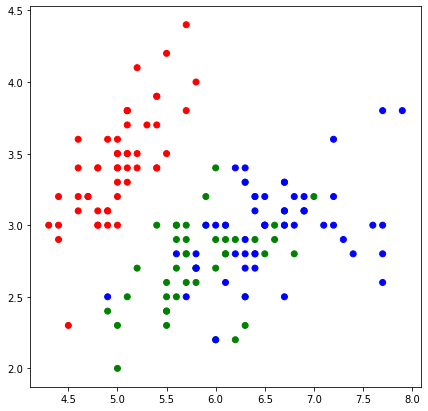

In [89]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [82]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

## Задание 1

К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [83]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1/(d[0] + 1)
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Напишем функцию для вычисления точности

In [84]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [85]:
k = 1

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.900


Построим график распределения классов.

In [13]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

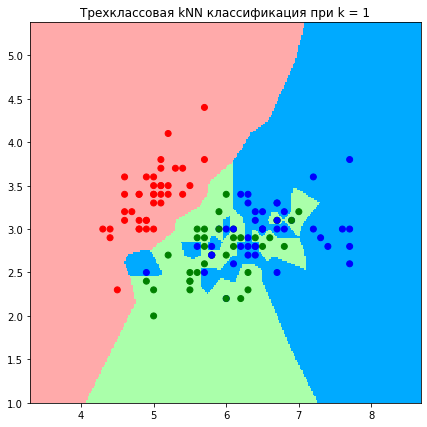

In [14]:
get_graph(X_train, y_train, k)

In [44]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.995


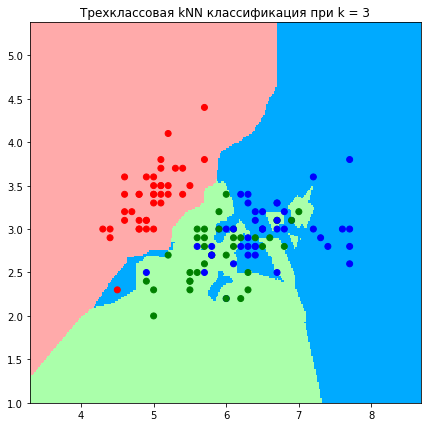

In [16]:
get_graph(X_train, y_train, k)

In [90]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.867


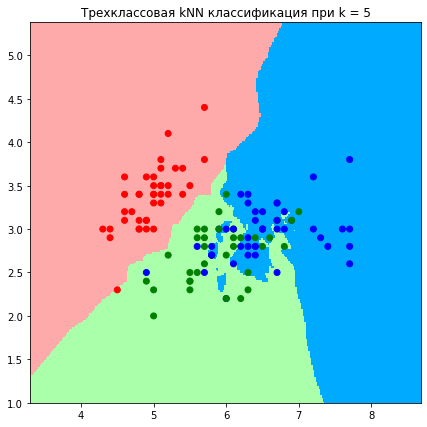

In [91]:
get_graph(X_train, y_train, k)

In [92]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.867


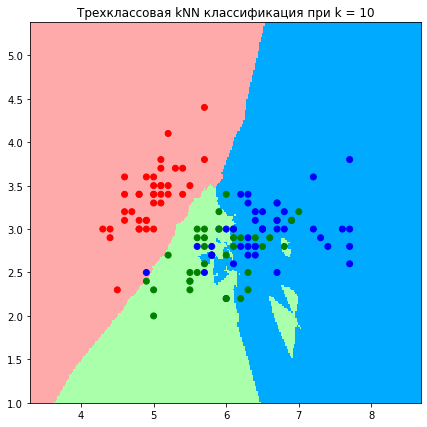

In [20]:
get_graph(X_train, y_train, k)

При увеличении k мы на графиках наблюдаем, как алгоритм меньше концентрируется на выбросах, однако, точность на тестовой выборке при этом увеличивается.

## Обучение без учителя. Кластеризация. K-means

Вначале сгенерируем три облака точек с помощью инструментов `sklearn`.

In [158]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=500, random_state=1)

In [159]:
X.shape

(500, 2)

Изобразим точки на графике.

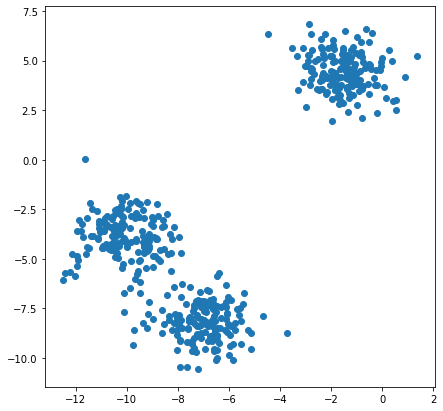

In [160]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

## Задание 2

Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить 
график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

В качестве метрики расстояния будем использовать евклидово расстояние, функция для которого была написана ранее. В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [161]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    inside_distance = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            min_distance = min(distances)
            classification = distances.index(min_distance)
            inside_distance[classification].append(min_distance)
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes, inside_distance

Напишем функцию для визуализации кластеров

In [162]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    

    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    plt.show()

In [166]:
def square_mean_distance(inside_distance):
    for key, value in inside_distance.items():
        d = np.array(value)**2
        print(key, np.average(d, axis=0)**0.5)

In [167]:
# определим максимальное количество итераций
max_iterations = 10

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

for i in range(1, 11):
    centroids, clusters, inside_distance = kmeans(X, i, max_iterations, min_distance)
    print('\nКол-во кластеров:', i)
    print('Среднее квадратичное расстояние:')
    square_mean_distance(inside_distance)


Кол-во кластеров: 1
Среднее квадратичное расстояние:
0 7.052835139096901

Кол-во кластеров: 2
Среднее квадратичное расстояние:
0 5.8444731083894945
1 3.087137160296087

Кол-во кластеров: 3
Среднее квадратичное расстояние:
0 4.190415183836698
1 1.509114473166515
2 1.3874593251387144

Кол-во кластеров: 4
Среднее квадратичное расстояние:
0 1.2797326004245084
1 1.212726053581468
2 1.3821294766814323
3 1.610104594843747

Кол-во кластеров: 5
Среднее квадратичное расстояние:
0 1.224336840741625
1 1.2018746072544402
2 1.2408455179114255
3 1.610104594843747
4 1.110450100309872

Кол-во кластеров: 6
Среднее квадратичное расстояние:
0 1.224336840741625
1 1.2018746072544402
2 1.2408455179114255
3 1.1544987385402559
4 1.110450100309872
5 1.3299737478489793

Кол-во кластеров: 7
Среднее квадратичное расстояние:
0 0.9086325370394965
1 1.0599059635463481
2 1.156801462918188
3 1.1544987385402559
4 1.104559789293864
5 1.3299737478489793
6 0.9761006619370801

Кол-во кластеров: 8
Среднее квадратичное расст

Проверим результат алгоритма после одной итерации

In [140]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

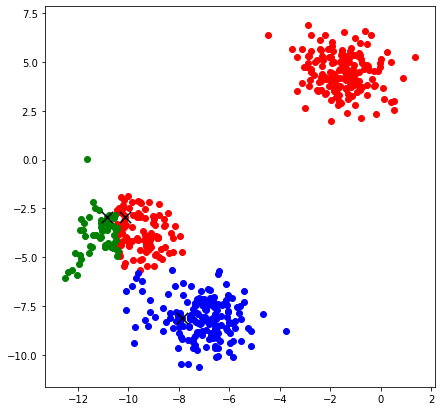

In [141]:
centroids, clusters, inside_distance = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [142]:
square_mean_distance(inside_distance)

8.978882585058592
1.522031992516131
1.6501761285806513


Проверим работу алгоритма при различном числе итераций.

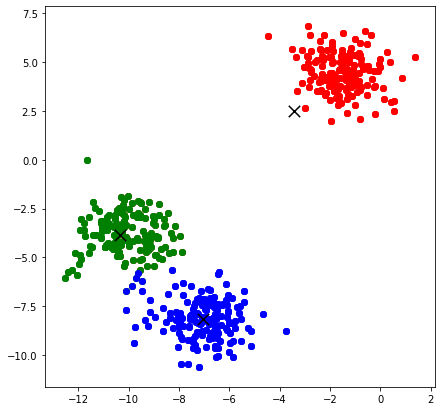

In [143]:
max_iterations = 3

centroids, clusters, inside_distance = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [144]:
square_mean_distance(inside_distance)

6.689995573476111
1.6458549389772084
1.4659138093968813


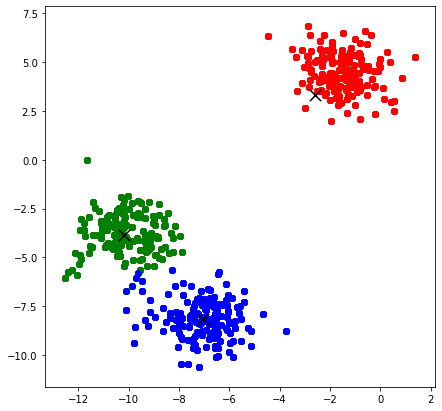

In [145]:
max_iterations = 5

centroids, clusters, inside_distance = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [146]:
square_mean_distance(inside_distance)

5.536357987001069
1.5646882073208321
1.4219082139743071


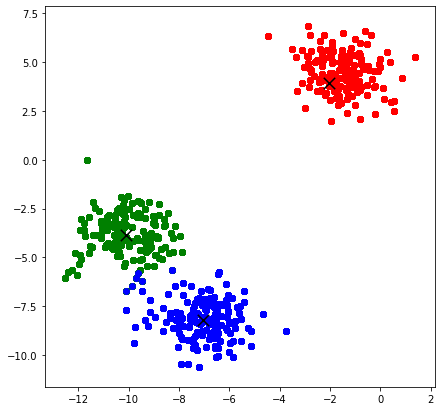

In [148]:
max_iterations = 10

centroids, clusters, inside_distance = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [149]:
square_mean_distance(inside_distance)

4.190415183836698
1.509114473166515
1.3874593251387144


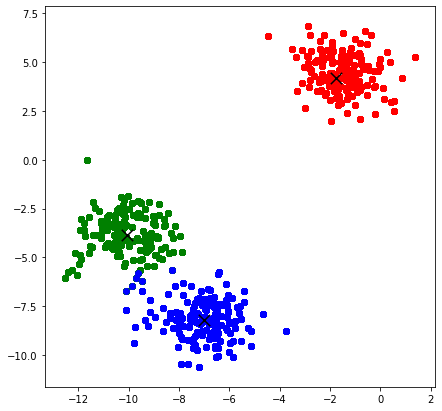

In [150]:
max_iterations = 20

centroids, clusters, inside_distance = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [153]:
square_mean_distance(inside_distance)

3.169694005622169
1.4829788878738768
1.3697428347674314


Видно, как при увеличении количества итераций центроиды перемещаются в центр образующихся кластеров.